# Breakhis-400x Dataset

In [1]:
print

<function print>

# MobileNet

In [2]:
import os

import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNet

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam



# Set the path to your balanced dataset

balanced_dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'



# Set the image dimensions and other parameters

input_shape = (224, 224, 3)

batch_size = 32

num_classes = 2

epochs = 100



# Create the data generator for training and validation without data augmentation

# Create the data generator for training and validation without data augmentation

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    

    rotation_range=20,         # Randomly rotate images in the range (degrees)

    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)

    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)

    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)

    zoom_range=0.15,           # Randomly zoom image

    horizontal_flip=True,      # Randomly flip images horizontally

    fill_mode='nearest' )



test_datagen = ImageDataGenerator(rescale=1./255)



train_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='training'

)



validation_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='validation'

)



# Calculate the class weights to handle data imbalance

class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))



# Load the MobileNet model with pre-trained weights, excluding the top layers

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)



# Freeze the base model layers

base_model.trainable = False



# Add custom layers on top of MobileNet

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

output = Dense(num_classes, activation='softmax')(x)



# Create the final model

model_mobilenet = Model(inputs=base_model.input, outputs=output)



# Compile the MobileNet model

model_mobilenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model with class weights

history2 = model_mobilenet.fit(train_generator_balanced, 

                               epochs=epochs, 

                               validation_data=validation_generator_balanced, 

                               class_weight=class_weights_balanced)



# Evaluate the model on the test set

test_generator = test_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    shuffle=False

)



# Evaluate MobileNet model on the test data

loss2, accuracy2 = model_mobilenet.evaluate(test_generator)

print('Loss:', loss2)

print(f'Test Accuracy: {accuracy2 * 100:.2f}%')

2024-08-20 07:16:12.664479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 07:16:12.664589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 07:16:12.827822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1275 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/40 ━━━━━━━━━━━━━━━━━━━━ 9:52 15s/step - accuracy: 0.5938 - loss: 0.7860

I0000 00:00:1724138205.141072      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724138205.169106      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/40 ━━━━━━━━━━━━━━━━━━━━ 13s 844ms/step - accuracy: 0.5606 - loss: 1.2860

W0000 00:00:1724138224.587840      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.5987 - loss: 1.1045

W0000 00:00:1724138233.436848      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6026 - loss: 1.0870 - val_accuracy: 0.6202 - val_loss: 0.7377
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 593ms/step - accuracy: 0.8133 - loss: 0.3999 - val_accuracy: 0.6514 - val_loss: 0.7237
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 601ms/step - accuracy: 0.8254 - loss: 0.3763 - val_accuracy: 0.7706 - val_loss: 0.5381
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 598ms/step - accuracy: 0.8517 - loss: 0.3457 - val_accuracy: 0.7651 - val_loss: 0.5378
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 598ms/step - accuracy: 0.8910 - loss: 0.2975 - val_accuracy: 0.7761 - val_loss: 0.4904
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 595ms/step - accuracy: 0.8943 - loss: 0.2658 - val_accuracy: 0.7872 - val_loss: 0.5202
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 592ms/step - accuracy: 0.8933 - loss: 0.2536 - val_accuracy: 0.7872 - val_loss: 0.5051
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 599ms/step - accuracy: 0.9041 - loss: 0.2284 - val_accuracy: 0

W0000 00:00:1724140949.577898      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [3]:
model_mobilenet.save('MobileNet_System_R.h5')

 3/57 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step

W0000 00:00:1724140954.692180      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step


W0000 00:00:1724140961.688938      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


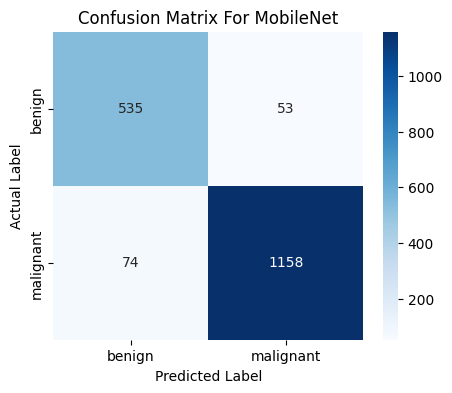

In [4]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns



# Predict the labels for the test set

Y_pred = model_mobilenet.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)



# Compute the confusion matrix

cm = confusion_matrix(test_generator.classes, y_pred)



# Plot the confusion matrix

beingsaved = plt.figure(figsize=(5, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

plt.title('Confusion Matrix For MobileNet')

plt.ylabel('Actual Label')

plt.xlabel('Predicted Label')

beingsaved.savefig('Confusion2.png', format='png', dpi=600, bbox_inches="tight")

plt.show()

# VGG16

In [5]:
import os

import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam



# Set the path to your balanced dataset

balanced_dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'



# Set the image dimensions and other parameters

input_shape = (224, 224, 3)

batch_size = 32

num_classes = 2

epochs = 100



# Create the data generator for training and validation without data augmentation

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    

    rotation_range=20,         # Randomly rotate images in the range (degrees)

    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)

    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)

    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)

    zoom_range=0.15,           # Randomly zoom image

    horizontal_flip=True,      # Randomly flip images horizontally

    fill_mode='nearest' )



test_datagen = ImageDataGenerator(rescale=1./255)



train_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='training'

)



validation_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='validation'

)



# Calculate the class weights to handle data imbalance

class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))



# Load the VGG16 model with pre-trained weights, excluding the top layers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)



# Freeze the base model layers

base_model.trainable = False



# Add custom layers on top of VGG16

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

output = Dense(num_classes, activation='softmax')(x)



# Create the final model

model_vgg16 = Model(inputs=base_model.input, outputs=output)



# Compile the VGG16 model

model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model with class weights

history3 = model_vgg16.fit(train_generator_balanced, 

                           epochs=epochs, 

                           validation_data=validation_generator_balanced, 

                           class_weight=class_weights_balanced)



# Evaluate the model on the test set

test_generator = test_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    shuffle=False

)



# Evaluate VGG16 model on the test data

loss3, accuracy3 = model_vgg16.evaluate(test_generator)

print('Loss:', loss3)

print(f'Test Accuracy: {accuracy3 * 100:.2f}%')

Found 1275 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5601 - loss: 0.7193 - val_accuracy: 0.6606 - val_loss: 0.6256
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 623ms/step - accuracy: 0.6966 - loss: 0.5747 - val_accuracy: 0.6440 - val_loss: 0.6346
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 619ms/step - accuracy: 0.7565 - loss: 0.5191 - val_accuracy: 0.6183 - val_loss: 0.6803
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 624ms/step - accuracy: 0.7874 - loss: 0.5177 - val_accuracy: 0.6569 - val_loss: 0.6193
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 616ms/step - accuracy: 0.7803 - loss: 0.4541 - val_accuracy: 0.6972 - val_loss: 0.5663
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 616ms/step - accuracy: 0.8174 - loss: 0.4175 - val_accuracy: 0.6899 - val_loss: 0.5875
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 615ms/step - accuracy: 0.7944 - loss: 0.4321 - val_accuracy: 0.7596 - val_loss: 0.4958
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 620ms/step - accuracy: 0.8235 - loss: 0.4134 - val_accuracy: 0

W0000 00:00:1724143897.834086      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Loss: 0.2748928666114807
Test Accuracy: 91.04%


In [6]:
model_vgg16.save('VGG16_System_R.h5')

57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step


W0000 00:00:1724143915.714912      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


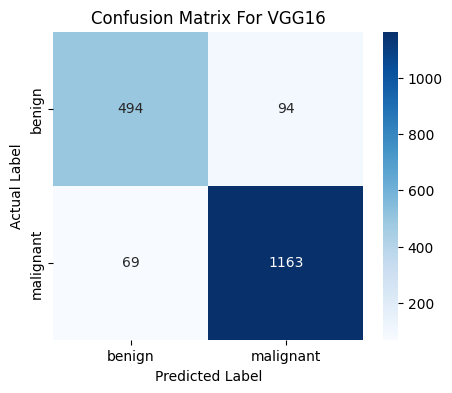

In [7]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns



# Predict the labels for the test set

Y_pred = model_vgg16.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)



# Compute the confusion matrix

cm = confusion_matrix(test_generator.classes, y_pred)



# Plot the confusion matrix

beingsaved = plt.figure(figsize=(5, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

plt.title('Confusion Matrix For VGG16')

plt.ylabel('Actual Label')

plt.xlabel('Predicted Label')

beingsaved.savefig('Confusion3.png', format='png', dpi=600, bbox_inches="tight")

plt.show()

# ResNet50

In [8]:
import os

import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam



# Set the path to your balanced dataset

balanced_dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'



# Set the image dimensions and other parameters

input_shape = (224, 224, 3)

batch_size = 32

num_classes = 2

epochs = 100



# Create the data generator for training and validation without data augmentation

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='training'

)



validation_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='validation'

)



# Calculate the class weights to handle data imbalance

class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))



# Load the ResNet50 model with pre-trained weights, excluding the top layers

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)



# Freeze the base model layers

base_model.trainable = False



# Add custom layers on top of ResNet50

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

output = Dense(num_classes, activation='softmax')(x)



# Create the final model

model_resnet = Model(inputs=base_model.input, outputs=output)



# Compile the ResNet model

model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model with class weights

history1 = model_resnet.fit(train_generator_balanced, 

                            epochs=epochs, 

                            validation_data=validation_generator_balanced, 

                            class_weight=class_weights_balanced)



# Evaluate the model on the test set

test_generator = test_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    shuffle=False

)



# Evaluate ResNet model on the test data

loss1, accuracy1 = model_resnet.evaluate(test_generator)

print('Loss:', loss1)

print(f'Test Accuracy: {accuracy1 * 100:.2f}%')

Found 1275 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7344 - loss: 1.1360  

W0000 00:00:1724143938.279175      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/40 ━━━━━━━━━━━━━━━━━━━━ 8s 492ms/step - accuracy: 0.5575 - loss: 1.1607

W0000 00:00:1724143948.460472      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.5396 - loss: 1.0438

W0000 00:00:1724143954.570691      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 554ms/step - accuracy: 0.5392 - loss: 1.0391 - val_accuracy: 0.6771 - val_loss: 0.6460
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5182 - loss: 0.6958 - val_accuracy: 0.3743 - val_loss: 0.7239
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5614 - loss: 0.7033 - val_accuracy: 0.3376 - val_loss: 0.7940
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.4923 - loss: 0.7047 - val_accuracy: 0.6771 - val_loss: 0.6188
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.5414 - loss: 0.6945 - val_accuracy: 0.6018 - val_loss: 0.6630
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.5405 - loss: 0.6702 - val_accuracy: 0.6771 - val_loss: 0.6299
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.5678 - loss: 0.7246 - val_accuracy: 0.3376 - val_loss: 0.8807
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.5458 - loss: 0.6988 - val_accuracy: 0.600

W0000 00:00:1724144627.032961      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [9]:
model_resnet.save('ResNet50_System_R.h5')

 3/57 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step

W0000 00:00:1724144635.610537      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step


W0000 00:00:1724144644.545308      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


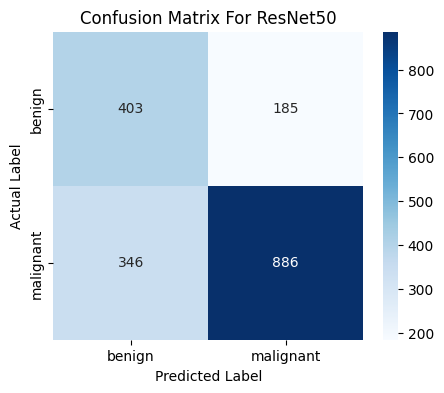

In [10]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns



# Predict the labels for the test set

Y_pred = model_resnet.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)



# Compute the confusion matrix

cm = confusion_matrix(test_generator.classes, y_pred)



# Plot the confusion matrix

beingsaved = plt.figure(figsize=(5, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

plt.title('Confusion Matrix For ResNet50')

plt.ylabel('Actual Label')

plt.xlabel('Predicted Label')

beingsaved.savefig('Confusion1.png', format='png', dpi=600, bbox_inches="tight")

plt.show()

# DenseNet

In [11]:
import os

import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import DenseNet121

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam



# Set the path to your balanced dataset

balanced_dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'



# Set the image dimensions and other parameters

input_shape = (224, 224, 3)

batch_size = 32

num_classes = 2

epochs = 100



# Create the data generator for training and validation without data augmentation

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,    

    rotation_range=20,         # Randomly rotate images in the range (degrees)

    width_shift_range=0.2,     # Randomly translate images horizontally (fraction of total width)

    height_shift_range=0.2,    # Randomly translate images vertically (fraction of total height)

    shear_range=0.15,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)

    zoom_range=0.15,           # Randomly zoom image

    horizontal_flip=True,      # Randomly flip images horizontally

    fill_mode='nearest' )



test_datagen = ImageDataGenerator(rescale=1./255)



train_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='training'

)



validation_generator_balanced = train_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    subset='validation'

)



# Calculate the class weights to handle data imbalance

class_weights_balanced = dict(zip(range(num_classes), ((len(train_generator_balanced.classes) / (num_classes * np.bincount(train_generator_balanced.classes))).tolist())))



# Load the DenseNet121 model with pre-trained weights, excluding the top layers

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)



# Freeze the base model layers

base_model.trainable = False



# Add custom layers on top of DenseNet121

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)

output = Dense(num_classes, activation='softmax')(x)



# Create the final model

model_densenet = Model(inputs=base_model.input, outputs=output)



# Compile the DenseNet model

model_densenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model with class weights

history4 = model_densenet.fit(train_generator_balanced, 

                              epochs=epochs, 

                              validation_data=validation_generator_balanced, 

                              class_weight=class_weights_balanced)



# Evaluate the model on the test set

test_generator = test_datagen.flow_from_directory(

    balanced_dataset_path,

    target_size=input_shape[:2],

    batch_size=batch_size,

    class_mode='categorical',

    shuffle=False

)



# Evaluate DenseNet model on the test data

loss4, accuracy4 = model_densenet.evaluate(test_generator)

print('Loss:', loss4)

print(f'Test Accuracy: {accuracy4 * 100:.2f}%')

Found 1275 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5859 - loss: 1.2824 

W0000 00:00:1724144690.553713      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/40 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5768 - loss: 0.9876

W0000 00:00:1724144720.702824      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6169 - loss: 0.8788

W0000 00:00:1724144735.498546      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6191 - loss: 0.8729 - val_accuracy: 0.7780 - val_loss: 0.5001
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 607ms/step - accuracy: 0.8173 - loss: 0.4322 - val_accuracy: 0.7725 - val_loss: 0.5148
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 611ms/step - accuracy: 0.8422 - loss: 0.3649 - val_accuracy: 0.7211 - val_loss: 0.5504
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 622ms/step - accuracy: 0.8417 - loss: 0.3622 - val_accuracy: 0.7908 - val_loss: 0.4632
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 611ms/step - accuracy: 0.8882 - loss: 0.2989 - val_accuracy: 0.7468 - val_loss: 0.4974
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 613ms/step - accuracy: 0.8700 - loss: 0.3288 - val_accuracy: 0.7853 - val_loss: 0.4489
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 687ms/step - accuracy: 0.8710 - loss: 0.2966 - val_accuracy: 0.7633 - val_loss: 0.5117
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 612ms/step - accuracy: 0.8874 - loss: 0.2727 - val_accuracy: 0

W0000 00:00:1724147537.145542      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [12]:
model_densenet.save('DenseNet_System_R.h5')

 3/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step

W0000 00:00:1724147555.344660      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step


W0000 00:00:1724147570.097965      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


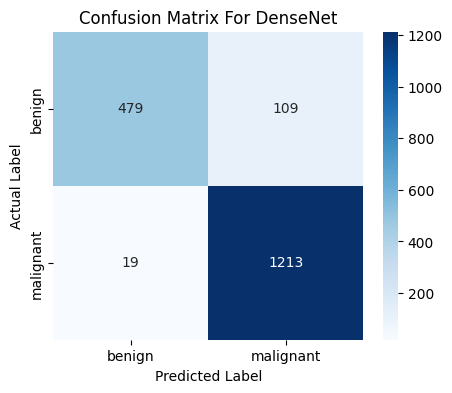

In [13]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns



# Predict the labels for the test set

Y_pred = model_densenet.predict(test_generator)

y_pred = np.argmax(Y_pred, axis=1)



# Compute the confusion matrix

cm = confusion_matrix(test_generator.classes, y_pred)



# Plot the confusion matrix

beingsaved = plt.figure(figsize=(5, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

plt.title('Confusion Matrix For DenseNet')

plt.ylabel('Actual Label')

plt.xlabel('Predicted Label')

beingsaved.savefig('Confusion4.png', format='png', dpi=600, bbox_inches="tight")

plt.show()

In [16]:
model_path = '/kaggle/working/DNBCD_Model.h5'  # Path to your saved model
model = load_model(model_path)

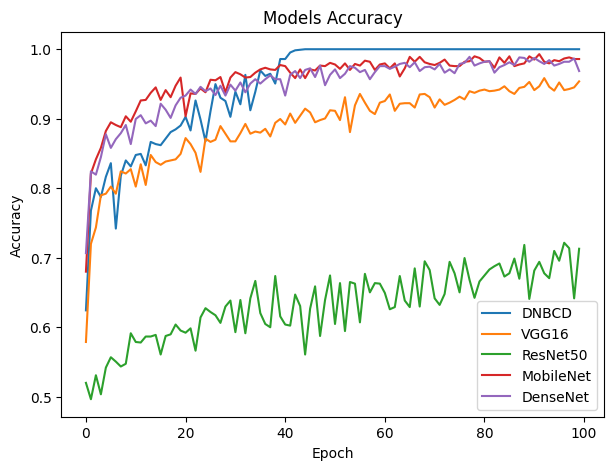

In [17]:
import matplotlib.pyplot as plt



# Accuracy values

acc_dnbcd = history.history['accuracy']

acc_resnet50 = history1.history['accuracy']

acc_mobilenet = history2.history['accuracy']

acc_vgg16 = history3.history['accuracy']

acc_densenet = history4.history['accuracy']



beingsaved = plt.figure(figsize=(7, 5))



plt.plot(acc_dnbcd, label='DNBCD')

plt.plot(acc_vgg16, label='VGG16')

plt.plot(acc_resnet50, label='ResNet50')

plt.plot(acc_mobilenet, label='MobileNet')

plt.plot(acc_densenet, label='DenseNet')





plt.title('Models Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

beingsaved.savefig('Accuracy.png', format='png', dpi=600, bbox_inches="tight")

plt.show()

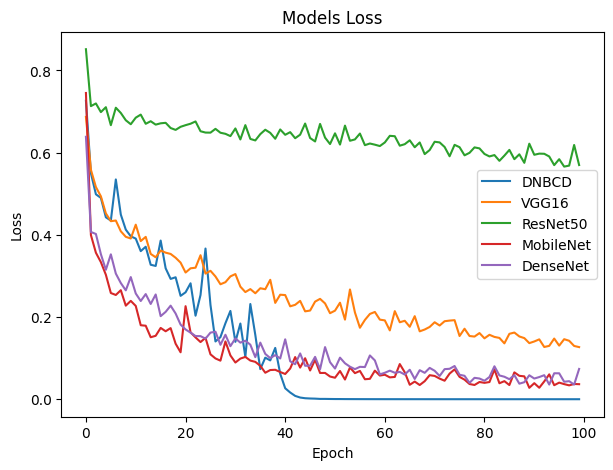

In [18]:
import matplotlib.pyplot as plt



# Accuracy values

acc_dnbcd = history.history['loss']

acc_resnet50 = history1.history['loss']

acc_mobilenet = history2.history['loss']

acc_vgg16 = history3.history['loss']

acc_densenet = history4.history['loss']



beingsaved = plt.figure(figsize=(7, 5))



plt.plot(acc_dnbcd, label='DNBCD')

plt.plot(acc_vgg16, label='VGG16')

plt.plot(acc_resnet50, label='ResNet50')

plt.plot(acc_mobilenet, label='MobileNet')

plt.plot(acc_densenet, label='DenseNet')





plt.title('Models Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

beingsaved.savefig('Loss.png', format='png', dpi=600, bbox_inches="tight")

plt.show()